In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import gc
import warnings

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set()
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")


In [2]:
# Path to Mercari training data
DATA_PATH = "../data/raw/train.tsv"

# Load dataset
print("Loading data...")
df = pd.read_csv(DATA_PATH, sep="\t")

print("Loaded:")
df.info()


Loading data...
Loaded:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [3]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0000,0,Complete with certificate of authenticity


In [4]:
# Missing value summary
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0].head(20)

brand_name         0.4268
category_name      0.0043
item_description   0.0000
dtype: float64

In [5]:
# Price summary
df['price'].describe()

count   1,482,535.0000
mean           26.7375
std            38.5861
min             0.0000
25%            10.0000
50%            17.0000
75%            29.0000
max         2,009.0000
Name: price, dtype: float64

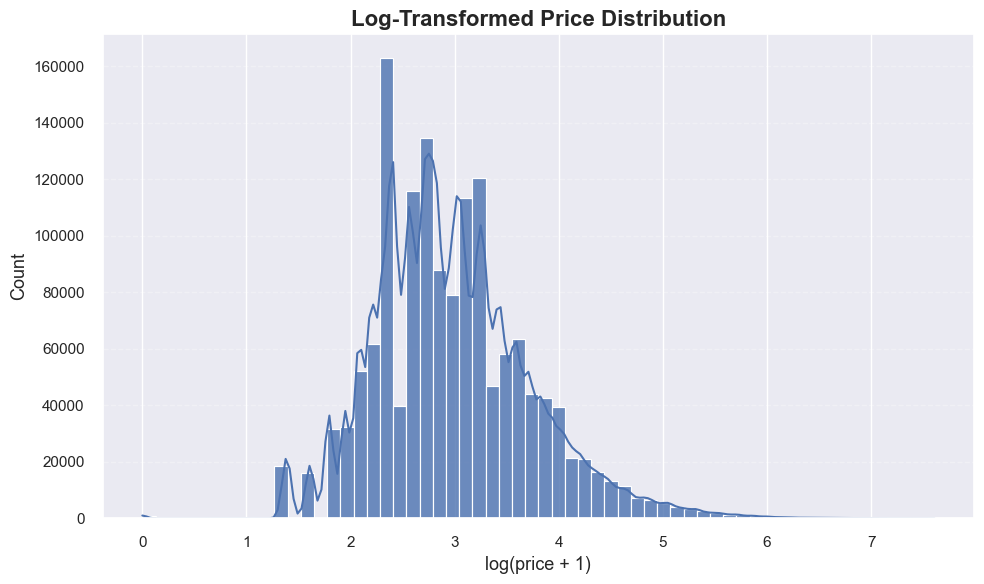

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram + KDE
sns.histplot(
    np.log1p(df['price']),
    bins=60,
    kde=True,
    edgecolor=None,
    alpha=0.8
)

# Titles & labels
plt.title("Log-Transformed Price Distribution", fontsize=16, fontweight='bold')
plt.xlabel("log(price + 1)", fontsize=13)
plt.ylabel("Count", fontsize=13)

# Grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Tight layout for spacing
plt.tight_layout()
plt.show()

In [8]:
# Fill missing categories with placeholder
df['category_name'] = df['category_name'].fillna("Unknown/Unknown/Unknown")

# Split into at most 3 parts: cat1, cat2, cat3
cats = df['category_name'].str.split('/', n=2, expand=True)

# Ensure we always have exactly 3 columns
cats = cats.reindex(columns=[0, 1, 2])

cats.columns = ['cat1', 'cat2', 'cat3']
df[['cat1', 'cat2', 'cat3']] = cats

# Quick check
df[['category_name', 'cat1', 'cat2', 'cat3']].head(10)

,category_name,cat1,cat2,cat3
0,Men/Tops/T-shirts,Men,Tops,T-shirts
1,Electronics/Computers & Tablets/Components & P...,Electronics,Computers & Tablets,Components & Parts
2,Women/Tops & Blouses/Blouse,Women,Tops & Blouses,Blouse
3,Home/Home Décor/Home Décor Accents,Home,Home Décor,Home Décor Accents
4,Women/Jewelry/Necklaces,Women,Jewelry,Necklaces
5,Women/Other/Other,Women,Other,Other
6,Women/Swimwear/Two-Piece,Women,Swimwear,Two-Piece
7,Sports & Outdoors/Apparel/Girls,Sports & Outdoors,Apparel,Girls
8,Sports & Outdoors/Apparel/Girls,Sports & Outdoors,Apparel,Girls
9,Vintage & Collectibles/Collectibles/Doll,Vintage & Collectibles,Collectibles,Doll


In [9]:
# Create a new feature: length of item_description
df['desc_len'] = df['item_description'].fillna("").apply(len)

# Summary statistics
df['desc_len'].describe()

count   1,482,535.0000
mean          145.7114
std           174.4464
min             0.0000
25%            40.0000
50%            86.0000
75%           174.0000
max         1,046.0000
Name: desc_len, dtype: float64

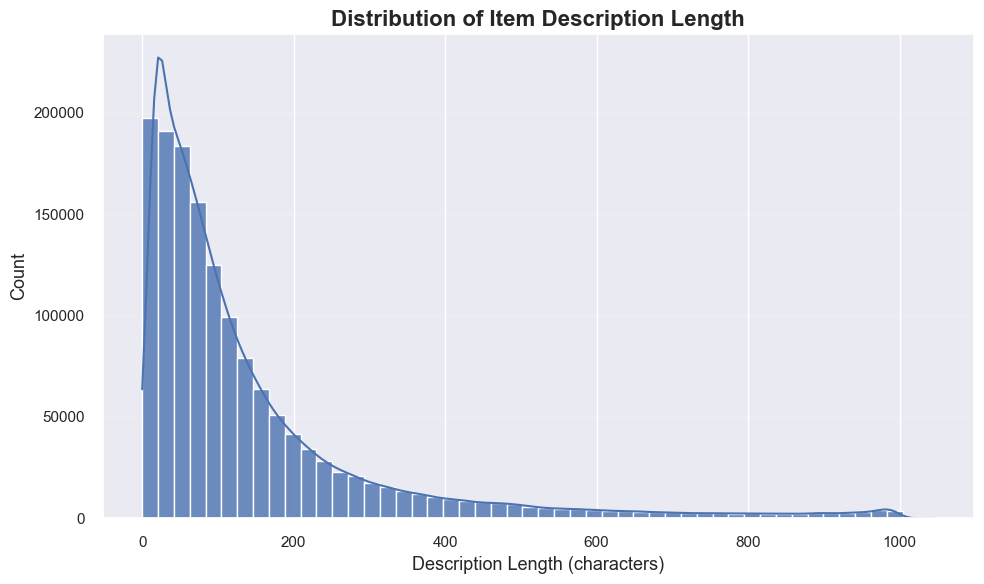

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['desc_len'], bins=50, kde=True, alpha=0.8)
plt.title("Distribution of Item Description Length", fontsize=16, fontweight='bold')
plt.xlabel("Description Length (characters)", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()